# The colored stochastic replicator model

The colored stochastic replicator model is stochastic process that generalized the replicator model. The replicator model is a deterministic model for the fraction of species $n=1,...,N$ governed by 

$$\dot x_i = (\mu_i-\phi)x_i$$

where the parameters $\mu_i$ are fitnesses of species $i$ and $\phi=\sum _i \mu_i x_i$ is the population mean fitness and the population is normalized to unity, i.e. $\sum x_i=1$ because the $x_i$ are fractions of the entire population.

In the colored stochastic replicator model the fitnesses are time dependent stochastic processes.

$$\mu_i(t)=\mu_i + \sigma_i Z_i(t) $$

and

$$\tau_i dZ_i=-Z_i dt+dW_i$$



In [1]:
## This is just for colors of the plots
from palettable.wesanderson import GrandBudapest3_6
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=GrandBudapest3_6.mpl_colors)
## --------

import matplotlib.pyplot as plt
import numpy as np
import stopro as p

## n populations with identical parameters and default timescale $\tau=1$

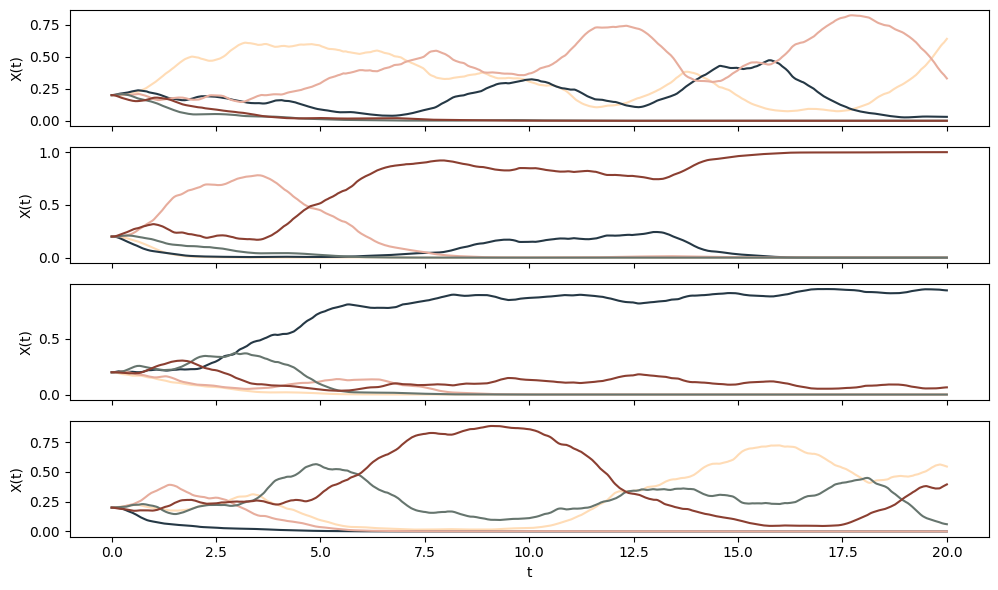

In [2]:
samples = 4
n = 5
mu = np.ones(n)
sigma = np.ones(n)

res = p.colored_replicator(20,0.001,N=5,samples=samples,gap=10)

fig,ax = plt.subplots(samples,1,figsize=[10,6],sharex=True)
for i in range(samples):
    for j in range(n):
        ax[i].plot(res["t"],np.squeeze(res["X"][i][j]))
        if i == samples -1 : ax[i].set_xlabel("t")
        ax[i].set_ylabel("X(t)")
fig.tight_layout()
plt.show()


## 5 populations with identical parameters and fast noise  $\tau=0.05$

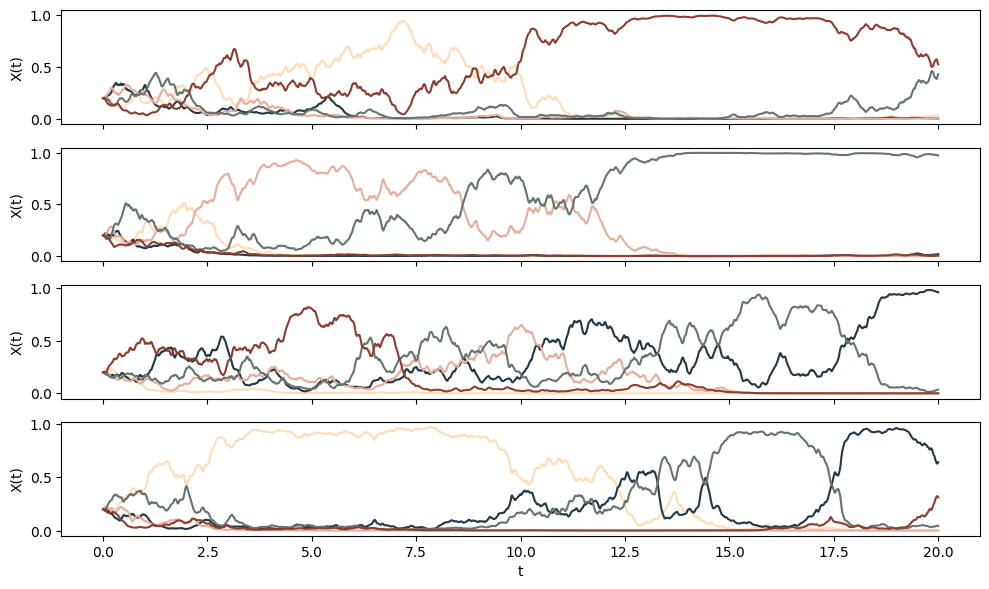

In [3]:
samples = 4
n = 5
mu = np.ones(n)
sigma = np.ones(n)
tau=0.05

res = p.colored_replicator(20,0.001,N=5,samples=samples,gap=10,tau=tau)

fig,ax = plt.subplots(samples,1,figsize=[10,6],sharex=True)
for i in range(samples):
    for j in range(n):
        ax[i].plot(res["t"],np.squeeze(res["X"][i][j]))
        if i == samples -1 : ax[i].set_xlabel("t")
        ax[i].set_ylabel("X(t)")
fig.tight_layout()
plt.show()


## two populations, many realizations

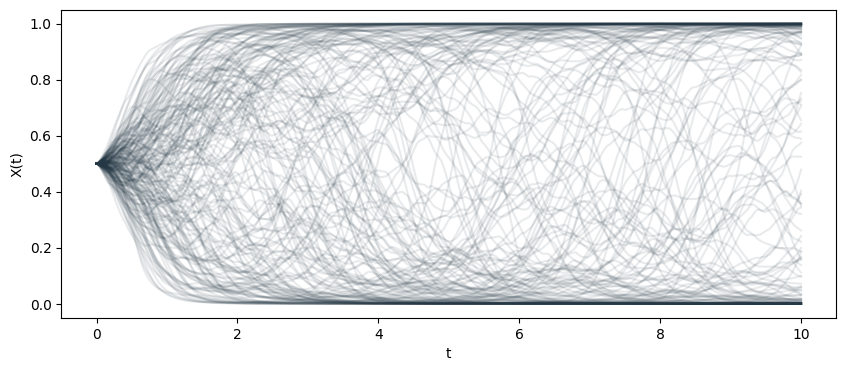

In [4]:
T = 10
samples = 200
N = 2
sigma = 2

res = p.colored_replicator(T,0.001,N=N,sigma=sigma,samples=samples,gap=10)

fig,ax = plt.subplots(1,1,figsize=[10,4])
for i in range(samples):
    ax.plot(res["t"],np.squeeze(res["X"][i][0]),color="C1",alpha=0.1)
    ax.set_xlabel("t")
    ax.set_ylabel("X(t)")

plt.show()


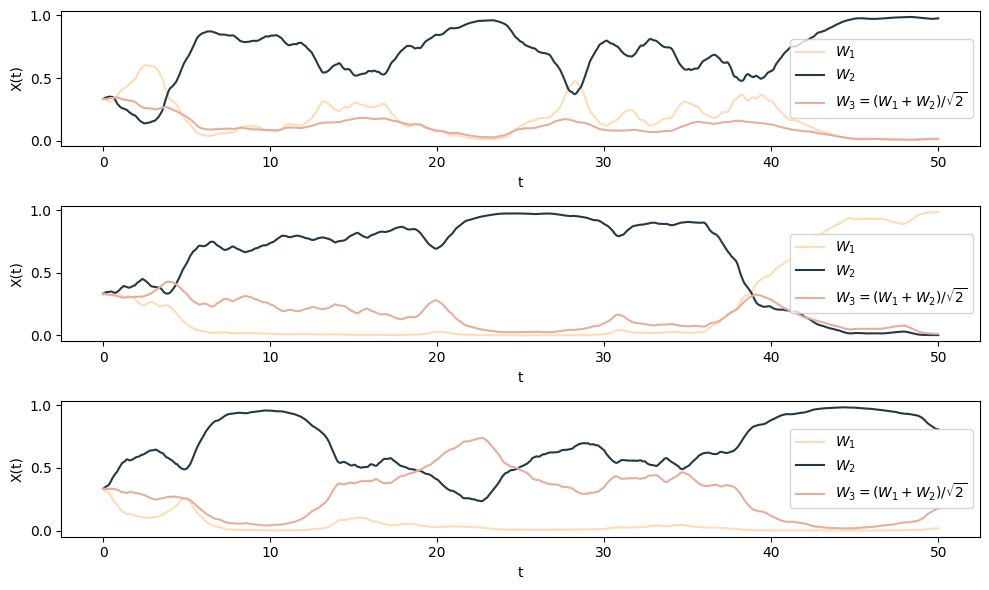

In [5]:
a = 1.0/np.sqrt(2)
cov = np.array([[1,0,a],[0,1,a],[a,a,1]])

samples = 3
N = 3


res = p.colored_replicator(50,0.001,N=N,covariance=cov,samples=samples,gap=10)

leg=[r"$W_1$",r"$W_2$",r"$W_3=(W_1+W_2)/\sqrt{2}$"]

fig,ax = plt.subplots(samples,1,figsize=[10,6])
for i in range(samples):
    for j in range(N):
        ax[i].plot(res["t"],np.squeeze(res["X"][i][j]))
        ax[i].set_xlabel("t")
        ax[i].set_ylabel("X(t)")
        ax[i].legend(leg)
fig.tight_layout()
plt.show()
